In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import sklearn.cross_decomposition
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
x1 = np.array([df['x1']]).T
x2 = np.array([df['x2']]).T
x3 = np.array([df['x3']]).T
X = np.array([df['x1'], df['x2'], df['x3']]).T
y = df['y'].values

The predicted value of f(1) is 3.889612284410805

The predicted value of f(1) is 1.85127565076

K is -2.0383366336508053, and Intercept is 5.9279489180616105


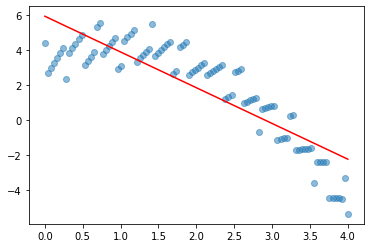

In [4]:
## Question 1:
## Run a simple linear regression model to predict y from x1. 
## Report the linear model you found. 
## Predict the value of y for a new x1 values of 1 and 2 respectively.
## 
## Your code here
##

# plot the data
plt.scatter(x1, y, alpha=0.5)

# defining the linear model
lr = LinearRegression()
# fit the model on the data
reg1 = LinearRegression().fit(x1, y)
plt.plot(x1, reg1.predict(x1), color = 'red')

# print the predicted values
print('The predicted value of f(1) is {}\n'.format(reg1.predict(np.array([[1]]))[0]))
print('The predicted value of f(1) is {}\n'.format(reg1.predict(np.array([[2]]))[0]))

# using the y = kx + b model, we can print them to make the model more clear
k = reg1.coef_[0]
b = reg1.intercept_
print("K is {}, and Intercept is {}".format(k ,b))

In [5]:
## Question 2:
## Use cross-validation to predict generalization error, 
## while the error of a single data point (x1, y) from a model M is defined as (M(x1)−y)^2. 
## Describe how you did this.
## 
## Your code here
##

x1, y = shuffle(x1, y, random_state = 0)
mse = cross_val_score(reg1, x1, y, cv=5, scoring='neg_mean_squared_error')

res = [-each for each in mse]
res = np.array(res)

# print the results
print('The mean squared error list is :\n{}\n'.format(res))
print('And the average is {}'.format(res.mean()))


The mean squared error list is :
[2.49596782 2.17102808 2.28856992 1.60502717 1.9579787 ]

And the average is 2.1037143380855037


Using degree of 2, the predicted values of f(1) is 4.251864056472464
Using degree of 2, the predicted values of f(2) is 3.219030004977255


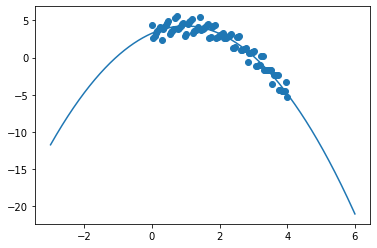

Using degree of 3, the predicted values of f(1) is 4.250618769472385
Using degree of 3, the predicted values of f(2) is 3.219030004977257


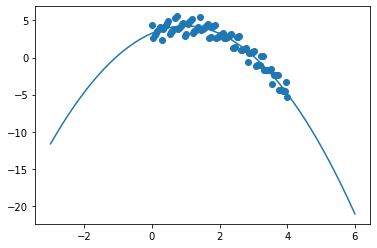

Using degree of 4, the predicted values of f(1) is 4.254719440387046
Using degree of 4, the predicted values of f(2) is 3.2135661153524993


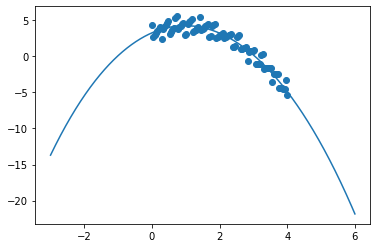

In [6]:
## Question 3:
## Predict y from x1 by consturcting polynomial regression models with degree of 2, 3, and 4 respectively.
## Report polynomial models with the above three degrees. 
## With each of these models, predict the value of y for a new x1 values of 1 and 2 respectively.
## 
## Your code here
##



# import the modules
from sklearn.preprocessing import PolynomialFeatures
# Since some previous actoins may modify X and y, so to we reload the data for safety 
X = np.array([df['x1'], df['x2'], df['x3']]).T
y = df['y'].values
x1 = np.array([df['x1']]).T

for i in range(2, 5):
#     defining the polynomial feature object
    poly = PolynomialFeatures(degree=i)
#     plot the data points
    plt.scatter(x1, y)
#     transform the x1 into the ploynomial version needed for training
    x1_transed = poly.fit_transform(x1)
#     define the linear model
    model = LinearRegression()
#     fit the linear model on the transformed dataset
    model.fit(x1_transed, y)
    
#   plot the figure of the function
    xpoints = np.linspace(-3, 6, 20000)
    ypoints = xpoints.reshape(xpoints.shape[0], 1)
    ys = model.predict(poly.transform(ypoints))
    plt.plot(xpoints, ys)
    
#     print the predicted values
    print('Using degree of {}, the predicted values of f(1) is {}'.format(i, model.predict(poly.transform(np.array([[1]])))[0]))
    print('Using degree of {}, the predicted values of f(2) is {}'.format(i, model.predict(poly.transform(np.array([[2]])))[0]))
    plt.show()


In [7]:
## Question 4:
## Run a simple linear regression model to predict y from X. 
## Report the linear model you found. 
## Predict the value of y for a new X values of (1, 1, 1), (1, 0, 4), and (3, 2, 1) respectively.
##
## your code here
##


# Since some previous actoins may modify X and y, so to we reload the data for safety 
X = np.array([df['x1'], df['x2'], df['x3']]).T
y = df['y'].values

# training the model
reg4 = LinearRegression().fit(X, y)

# print the predicted values
print('The predicted value of [1, 1, 1] is {}'.format(reg4.predict(np.array([[1, 1, 1]]))[0]))
print('The predicted value of [1, 0, 4] is {}'.format(reg4.predict(np.array([[1, 0, 4]]))[0]))
print('The predicted value of [3, 2, 1] is {}'.format(reg4.predict(np.array([[3, 2, 1]]))[0]))

# And we use the y = k1 * x1 + k2 * x2 + k3 * x4 + b model
# Here we can also output the learnable parameters k1, k2, k3 and b
k_list = reg4.coef_
b = reg4.intercept_


# print the results
print('\n')
for i in range(len(k_list)):
    print('k{} is {}'.format(i + 1, k_list[i]))

print('And b is {}'.format(b))

The predicted value of [1, 1, 1] is 3.5774093742980684
The predicted value of [1, 0, 4] is 2.24804044160411
The predicted value of [3, 2, 1] is 0.10253417289227329


k1 is -2.0037192687680783
k2 is 0.5325633361303611
k3 is -0.26560186552119913
And b is 5.314167172456985


In [8]:
## Question 5:
## Use cross-validation to predict generalization error, 
## while the error of a single data point (X, y) from a model M is defined as (M(X)−y)^2. 
## Describe how you did this.
## 
## Your code here
##



# Training the model reg5
reg5 = LinearRegression().fit(X, y)

# Similar to the situation above, we need to shuffle the data before k-fold validation
X2, y2 = shuffle(X, y, random_state = 0)

#  here the cross_val_score return a 'list' object, the method is negative mean squared error
mse = cross_val_score(reg5, X2, y2, cv=5, scoring='neg_mean_squared_error')

# converting the nagative values into positive ones
res = [-each for each in mse]
res = np.array(res)

# print the results
print('The mean squared error list is :\n{}\n'.format(res))
print('And the average is {}'.format(res.mean()))

The mean squared error list is :
[1.55991455 1.55350328 2.34322427 1.55181625 1.40539521]

And the average is 1.682770710870447
